In [14]:
!python3 keras_mnist_simple.py

Using TensorFlow backend.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are avai

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

--2017-02-19 11:46:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: 'pima-indians-diabetes.data'

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.1s    

2017-02-19 11:46:16 (166 KB/s) - 'pima-indians-diabetes.data' saved [23279/23279]



In [3]:
import tensorflow as tf
import numpy as np

In [4]:
# Let's get the data

dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=',')

In [5]:
X = dataset[:, 0:8].tolist()
X = np.array([[1.] + row for row in X]).reshape(-1, 9)
Y = dataset[:, 8].reshape(-1,1)
print(X[0])
print(Y[0])

[   1.       6.     148.      72.      35.       0.      33.6      0.627
   50.   ]
[ 1.]


In [6]:
def init_weights(shape):
    
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w_1, w_2, w_3):
    
    h = tf.nn.relu(tf.matmul(X,w_1))
    
    h2 = tf.nn.relu(tf.matmul(h, w_2))
    
    o = tf.nn.sigmoid(tf.matmul(h2, w_3))
    
    return o

x = tf.placeholder(tf.float32, [None, 9])
y_ = tf.placeholder(tf.float32, [None, 1])

w_1 = init_weights([9, 12])
w_2 = init_weights([12, 8])
w_3 = init_weights([8, 1])

mod = model(x, w_1, w_2, w_3)

cross_entropy = tf.reduce_mean(tf.squared_difference(mod, y_))



In [7]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [8]:
sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

In [9]:
train_accuracy = []
for i in range(1500):
    
    for start, end in zip(range(0,768, 16), range(128, 769, 16)):
        train_step.run({x: X[start:end], y_:Y[start:end]})
    
    train_result = mod.eval({x: X[0:768]})
    
    if i % 100 is 0:
        accuracy = np.mean(Y[0:768] == np.round(train_result))
        train_accuracy.append(accuracy)
        print("Train accuracy: ", accuracy)
                

Train accuracy:  0.651041666667
Train accuracy:  0.7109375
Train accuracy:  0.7265625
Train accuracy:  0.733072916667
Train accuracy:  0.7421875
Train accuracy:  0.75
Train accuracy:  0.760416666667
Train accuracy:  0.772135416667
Train accuracy:  0.77734375
Train accuracy:  0.778645833333
Train accuracy:  0.786458333333
Train accuracy:  0.795572916667
Train accuracy:  0.799479166667
Train accuracy:  0.80078125
Train accuracy:  0.80078125


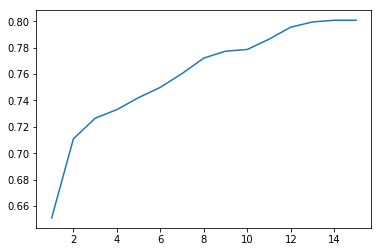

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1,16), train_accuracy)